In [12]:
import cv2
import matplotlib.pyplot as plt

Your Panorama is ready!!!


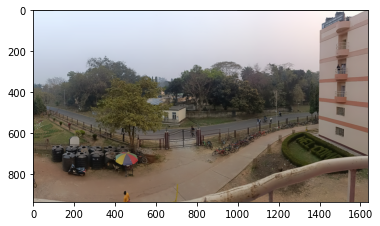

In [15]:
image_paths=['IMG_20230120_170126.jpg','IMG_20230120_170057.jpg','IMG_20230120_170135.jpg']
# initialized a list of images
imgs = []
  
for i in range(len(image_paths)):
    imgs.append(cv2.imread(image_paths[i]))
    imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4)
    # this is optional if your input images isn't too large
    # you don't need to scale down the image
    # in my case the input images are of dimensions 3000x1200
    # and due to this the resultant image won't fit the screen
    # scaling down the images 
# showing the original pictures
# cv2.imshow('1',imgs[0])
# cv2.imshow('2',imgs[1])
# cv2.imshow('3',imgs[2])
  
stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(imgs)
  
if dummy != cv2.STITCHER_OK:
  # checking if the stitching procedure is successful
  # .stitch() function returns a true value if stitching is 
  # done successfully
    print("stitching ain't successful")
else: 
    print('Your Panorama is ready!!!')
  
# show the output image
plt.imshow(output[:,:,::-1])
plt.show()

# final output
# cv2.imshow('final result',output)
  
# cv2.waitKey(0)

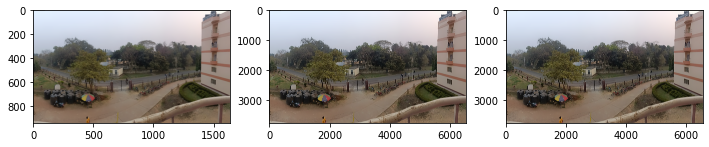

In [21]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "EDSR_x4.pb"
 
sr.readModel(path)
 
sr.setModel("edsr",4)
 
result = sr.upsample(output)
 
# Resized image
resized = cv2.resize(output,dsize=None,fx=4,fy=4)
 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(output[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()